In [1]:
import ffmpeg
input_video_path = 'C:/Users/91924/Desktop/MY WORKS/sem 7/image and video analytics/Walt Disney Animation Studios-Steamboat Willie Intro.mp4'

try:
    probe = ffmpeg.probe(input_video_path)

    # Extract video stream information
    video_stream = next((stream for stream in probe['streams'] if stream['codec_type'] == 'video'), None)

    if video_stream:
        width = video_stream['width']
        height = video_stream['height']
        frame_rate = eval(video_stream['r_frame_rate'])
        duration = float(video_stream['duration'])
        num_frames = int(video_stream['nb_frames'])

        print(f"Frame Width: {width}")
        print(f"Frame Height: {height}")
        print(f"Frame Rate: {frame_rate} frames per second")
        print(f"Duration: {duration} seconds")
        print(f"Number of Frames: {num_frames}")
    else:
        print("No video stream found in the file.")

except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please ensure ffmpeg is installed and added to the system PATH.")


Frame Width: 640
Frame Height: 270
Frame Rate: 30.0 frames per second
Duration: 15.366667 seconds
Number of Frames: 461


[Parsed_showinfo_0 @ 000001c0fd6ae400] n:   0 pts:      0 pts_time:0       duration:    512 duration_time:0.0333333 fmt:yuv420p cl:left sar:1/1 s:640x270 i:P iskey:1 type:I checksum:F257E677 plane_checksum:[1DB61D8E EB7AC0FD B11F07EC] mean:[19 127 129] stdev:[0.6 0.2 0.2]
[Parsed_showinfo_0 @ 000001c0fd6ae400] n:   1 pts:    512 pts_time:0.0333333 duration:    512 duration_time:0.0333333 fmt:yuv420p cl:left sar:1/1 s:640x270 i:P iskey:1 type:I checksum:0EE5AD1B plane_checksum:[177AA7C0 D5C86949 9B749C03] mean:[24 127 130] stdev:[1.3 0.6 0.4]
[Parsed_showinfo_0 @ 000001c0fd6ae400] n:   2 pts:   1024 pts_time:0.0666667 duration:    512 duration_time:0.0333333 fmt:yuv420p cl:left sar:1/1 s:640x270 i:P iskey:0 type:P checksum:0EE5AD1B plane_checksum:[177AA7C0 D5C86949 9B749C03] mean:[24 127 130] stdev:[1.3 0.6 0.4]
[Parsed_showinfo_0 @ 000001c0fd6ae400] n:   3 pts:   1536 pts_time:0.1     duration:    512 duration_time:0.0333333 fmt:yuv420p cl:left sar:1/1 s:640x270 i:P iskey:1 type:I chec

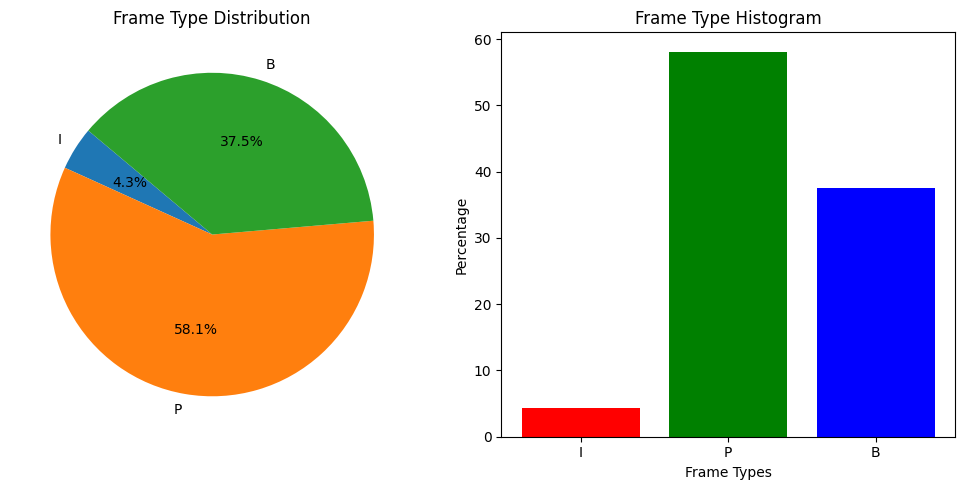

In [4]:
import subprocess
import matplotlib.pyplot as plt

def extract_frame_types(video_path):
    command = [
        'ffmpeg',
        '-i', video_path,
        '-vf', 'showinfo',
        '-f', 'null',
        '-'
    ]
    result = subprocess.run(command, stderr=subprocess.PIPE, text=True)
    output = result.stderr

    frame_types = {'I': 0, 'P': 0, 'B': 0}
    for line in output.split('\n'):
        if 'type:' in line:
            print(line)  # Debugging: Print the line containing 'type:'
            if 'type:I' in line:
                frame_types['I'] += 1
            elif 'type:P' in line:
                frame_types['P'] += 1
            elif 'type:B' in line:
                frame_types['B'] += 1
    
    return frame_types

video_path = 'C:/Users/91924/Desktop/MY WORKS/sem 7/image and video analytics/Walt Disney Animation Studios-Steamboat Willie Intro.mp4'
frame_types = extract_frame_types(video_path)
total_frames = sum(frame_types.values())
if total_frames == 0:
    print('No frames were detected.')
else:
    frame_percentages = {k: (v / total_frames) * 100 for k, v in frame_types.items()}

    # Printing percentages
    print('Frame percentages:', frame_percentages)

    # Plotting the distribution as a pie chart
    labels = list(frame_percentages.keys())
    sizes = list(frame_percentages.values())
    plt.figure(figsize=(10, 5))

    # Pie chart
    plt.subplot(1, 2, 1)
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Frame Type Distribution')

    # Histogram
    plt.subplot(1, 2, 2)
    plt.bar(labels, sizes, color=['red', 'green', 'blue'])
    plt.xlabel('Frame Types')
    plt.ylabel('Percentage')
    plt.title('Frame Type Histogram')

    plt.tight_layout()
    plt.show()


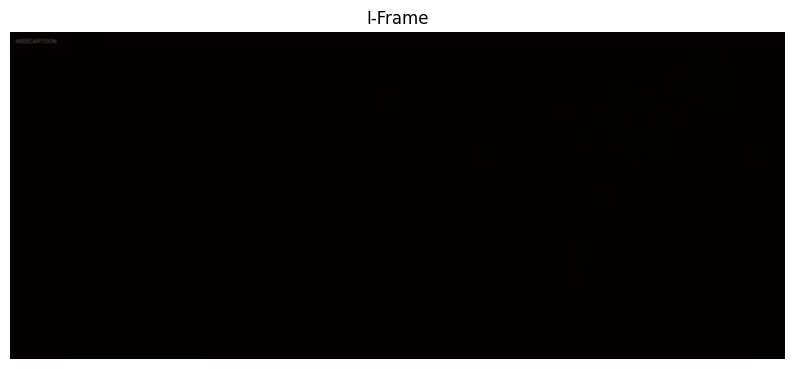

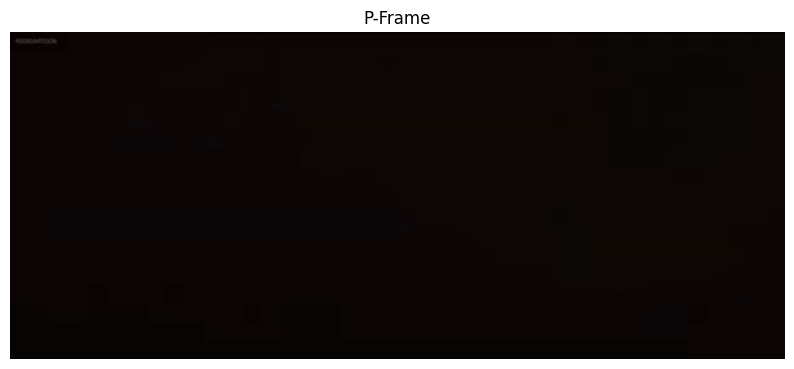

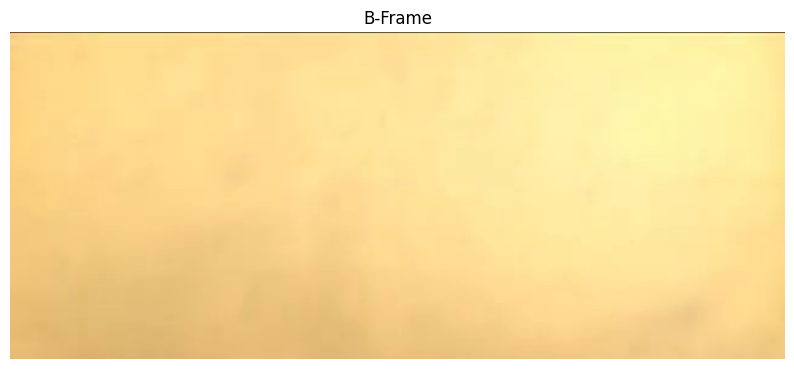

In [6]:
import cv2
import matplotlib.pyplot as plt

# Load and display I-frame
i_frame_path = "C:/Users/91924/Desktop/MY WORKS/sem 7/image and video analytics/iframes/i_frames_001.png"
i_frame = cv2.imread(i_frame_path)
if i_frame is not None:
    i_frame_rgb = cv2.cvtColor(i_frame, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(i_frame_rgb)
    plt.title('I-Frame')
    plt.axis('off')
    plt.show()
else:
    print(f"Error: File not found at {i_frame_path}")

# Load and display P-frame
p_frame_path = "C:/Users/91924/Desktop/MY WORKS/sem 7/image and video analytics/pframe/p_frames_001.png"
p_frame = cv2.imread(p_frame_path)
if p_frame is not None:
    p_frame_rgb = cv2.cvtColor(p_frame, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(p_frame_rgb)
    plt.title('P-Frame')
    plt.axis('off')
    plt.show()
else:
    print(f"Error: File not found at {p_frame_path}")

# Load and display B-frame
b_frame_path = "C:/Users/91924/Desktop/MY WORKS/sem 7/image and video analytics/bframes/b_frames_001.png"
b_frame = cv2.imread(b_frame_path)
if b_frame is not None:
    b_frame_rgb = cv2.cvtColor(b_frame, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(b_frame_rgb)
    plt.title('B-Frame')
    plt.axis('off')
    plt.show()
else:
    print(f"Error: File not found at {b_frame_path}")


In [5]:
import os
from skimage import io
from skimage.metrics import structural_similarity as ssim

def get_file_size(file_path):
    """Returns the file size in bytes."""
    if os.path.exists(file_path):
        return os.path.getsize(file_path)
    else:
        print(f"Error: File not found at {file_path}")
        return None

def calculate_ssim(image_path1, image_path2, data_range):
    """Calculates the SSIM between two images."""
    image1 = io.imread(image_path1, as_gray=True)
    image2 = io.imread(image_path2, as_gray=True)
    ssim_index, _ = ssim(image1, image2, data_range=data_range, full=True)
    return ssim_index

# Paths
i_frame_path = "C:/Users/91924/Desktop/MY WORKS/sem 7/image and video analytics/iframes/i_frames_001.png"
p_frame_path = "C:/Users/91924/Desktop/MY WORKS/sem 7/image and video analytics/pframe/p_frames_001.png"
b_frame_path = "C:/Users/91924/Desktop/MY WORKS/sem 7/image and video analytics/bframes/b_frames_001.png"

# Getting sizes
i_frame_size = get_file_size(i_frame_path)
p_frame_size = get_file_size(p_frame_path)
b_frame_size = get_file_size(b_frame_path)

print(f"I-frame size: {i_frame_size / 1024:.2f} KB")
print(f"P-frame size: {p_frame_size / 1024:.2f} KB")
print(f"B-frame size: {b_frame_size / 1024:.2f} KB")

# Assuming 8-bit images
data_range = 255

# Calculating SSIM
ssim_p_vs_i = calculate_ssim(i_frame_path, p_frame_path, data_range)
ssim_b_vs_i = calculate_ssim(i_frame_path, b_frame_path, data_range)
ssim_b_vs_p = calculate_ssim(p_frame_path, b_frame_path, data_range)

print(f"SSIM between I-frame and P-frame: {ssim_p_vs_i:.4f}")
print(f"SSIM between I-frame and B-frame: {ssim_b_vs_i:.4f}")
print(f"SSIM between P-frame and B-frame: {ssim_b_vs_p:.4f}")


I-frame size: 2.84 KB
P-frame size: 4.54 KB
B-frame size: 27.58 KB
SSIM between I-frame and P-frame: 0.9999
SSIM between I-frame and B-frame: 0.8990
SSIM between P-frame and B-frame: 0.9039


In [ ]:
import os

# Function to get file size
def get_file_size(filepath):
    return os.path.getsize(filepath)

# Function to list all files in a directory
def list_files_in_directory(directory_path):
    return [os.path.join(directory_path, filename) for filename in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, filename))]

# Function to calculate average size
def calculate_average_size(frame_paths):
    total_size = sum(get_file_size(path) for path in frame_paths)
    return total_size / len(frame_paths) if frame_paths else 0

# Paths to your frame directories
i_frame_dir = 'C:/Users/91924/Desktop/MY WORKS/sem 7/image and video analytics/iframes'
p_frame_dir = 'C:/Users/91924/Desktop/MY WORKS/sem 7/image and video analytics/pframe'
b_frame_dir = 'C:/Users/91924/Desktop/MY WORKS/sem 7/image and video analytics/bframes'

# List files in each directory
i_frame_paths = list_files_in_directory(i_frame_dir)
p_frame_paths = list_files_in_directory(p_frame_dir)
b_frame_paths = list_files_in_directory(b_frame_dir)

# Calculate average sizes
avg_i_frame_size = calculate_average_size(i_frame_paths)
avg_p_frame_size = calculate_average_size(p_frame_paths)
avg_b_frame_size = calculate_average_size(b_frame_paths)

# Print average sizes
print(f"Average I Frame Size: {avg_i_frame_size} bytes")
print(f"Average P Frame Size: {avg_p_frame_size} bytes")
print(f"Average B Frame Size: {avg_b_frame_size} bytes")


Average I Frame Size: 31601.1 bytes
Average P Frame Size: 113192.69402985074 bytes
Average B Frame Size: 127643.63005780347 bytes


In [ ]:
import cv2
import os
frames_path = 'C:/Users/91924/Desktop/MY WORKS/sem 7/image and video analytics/iframes'
output_video_path = 'C:/Users/91924/Desktop/output_video.mp4'


frame_rate = 1 

# Get list of files in the directory and sort them
frames = sorted([f for f in os.listdir(frames_path) if f.endswith('.png')])

# Read the first frame to get width and height
first_frame = cv2.imread(os.path.join(frames_path, frames[0]))
height, width, _ = first_frame.shape

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  
video_writer = cv2.VideoWriter(output_video_path, fourcc, frame_rate, (width, height))

# Write each frame to the video
for frame_file in frames:
    frame_path = os.path.join(frames_path, frame_file)
    frame = cv2.imread(frame_path)
    video_writer.write(frame)

# Release the VideoWriter object
video_writer.release()
